<a href="https://colab.research.google.com/github/jeongjinjoo/Big-Data-practice/blob/main/LH_Made_Cookies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [36]:
import pandas as pd
df = pd.read_csv('7.성남시_지식산업센터.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gbn            56 non-null     object 
 1   klg_ids_ct_nm  56 non-null     object 
 2   lon            56 non-null     float64
 3   lat            56 non-null     float64
 4   addr           56 non-null     object 
 5   rd_addr        56 non-null     object 
 6   useapr_day     56 non-null     object 
 7   use_area       56 non-null     object 
 8   arch_area      56 non-null     int64  
 9   tot_cpn        51 non-null     float64
 10  cpn_in_2101    41 non-null     float64
 11  cpn_in_2201    43 non-null     float64
 12  cpn_in_2302    47 non-null     float64
 13  cpn_in_2402    50 non-null     float64
 14  cpn_in_2406    49 non-null     float64
 15  rmrk           10 non-null     object 
dtypes: float64(8), int64(1), object(7)
memory usage: 7.1+ KB
None
        gbn klg_ids_ct_nm         lon 

In [37]:
# 1. 결측치 확인
print(df.isnull().sum())

# 2. 중복 데이터 확인 및 제거 (필요시)
print(df.duplicated().sum()) # 중복데이터 : 0
# df = df.drop_duplicates()

# # 3. 데이터 타입 확인 및 변환
df['useapr_day'] = pd.to_datetime(df['useapr_day'], errors='coerce')  # 건축사용승인 날짜 변환

# 4. 결측치 처리
# 필요한 컬럼만 결측치 처리 방법 결정
df.fillna({'arch_area': 0, 'tot_cpn': 0, 'addr': '미상'}, inplace=True)


gbn               0
klg_ids_ct_nm     0
lon               0
lat               0
addr              0
rd_addr           0
useapr_day        0
use_area          0
arch_area         0
tot_cpn           5
cpn_in_2101      15
cpn_in_2201      13
cpn_in_2302       9
cpn_in_2402       6
cpn_in_2406       7
rmrk             46
dtype: int64
0


<ipython-input-37-d6e4c188c80a>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['useapr_day'] = pd.to_datetime(df['useapr_day'], errors='coerce')  # 건축사용승인 날짜 변환


In [41]:
# 'useapr_day' 결측치를 최신 날짜로 채우기 (inplace 사용하지 않음)
df['useapr_day'] = df['useapr_day'].fillna(df['useapr_day'].max())

# 'cpn_in_*' 결측치를 평균값으로 채우기
cpn_cols = ['cpn_in_2101', 'cpn_in_2201', 'cpn_in_2302', 'cpn_in_2402', 'cpn_in_2406']
for col in cpn_cols:
    df[col] = df[col].fillna(df[col].mean())

# 'rmrk' 결측치를 '미상'으로 채우기
df['rmrk'] = df['rmrk'].fillna('미상')

# 최종 결측치 확인
print(df.isnull().sum())

print(df['useapr_day'].dtype)  # 'useapr_day' 컬럼의 데이터 타입 확인

# NaT 값이 있는지 확인
print(df[df['useapr_day'].isna()])

# NaT 값을 특정 날짜로 채우기
df['useapr_day'].fillna(pd.to_datetime('2023-12-31'), inplace=True)  # 예시로 2023-12-31로 채우기

# 최대값 확인
max_date = df['useapr_day'].max()
print(max_date)

# 최대값으로 결측치 채우기
df['useapr_day'].fillna(max_date, inplace=True)



gbn              0
klg_ids_ct_nm    0
lon              0
lat              0
addr             0
rd_addr          0
useapr_day       0
use_area         0
arch_area        0
tot_cpn          0
cpn_in_2101      0
cpn_in_2201      0
cpn_in_2302      0
cpn_in_2402      0
cpn_in_2406      0
rmrk             0
dtype: int64
datetime64[ns]
Empty DataFrame
Columns: [gbn, klg_ids_ct_nm, lon, lat, addr, rd_addr, useapr_day, use_area, arch_area, tot_cpn, cpn_in_2101, cpn_in_2201, cpn_in_2302, cpn_in_2402, cpn_in_2406, rmrk]
Index: []
2023-12-31 00:00:00


<ipython-input-41-027a560c2567>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['useapr_day'].fillna(pd.to_datetime('2023-12-31'), inplace=True)  # 예시로 2023-12-31로 채우기
<ipython-input-41-027a560c2567>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [42]:
# 1. 공실률 계산 (각 연도별)
for col in ['cpn_in_2101', 'cpn_in_2201', 'cpn_in_2302', 'cpn_in_2402', 'cpn_in_2406']:
    df[f'{col}_vacancy_rate'] = (1 - (df[col] / df['tot_cpn'])) * 100
    # 0으로 나누는 오류 방지
    df[f'{col}_vacancy_rate'] = df.apply(
        lambda row: (1 - (row[col] / row['tot_cpn'])) * 100 if row['tot_cpn'] != 0 else 0,
        axis=1
    )

# 2. 건축연도 파생
df['construction_year'] = df['useapr_day'].dt.year

# 3. 센터 크기 비율 (전체 대비)

area_sum = df['arch_area'].sum()
df['area_ratio'] = df['arch_area'] / area_sum if area_sum != 0 else 0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

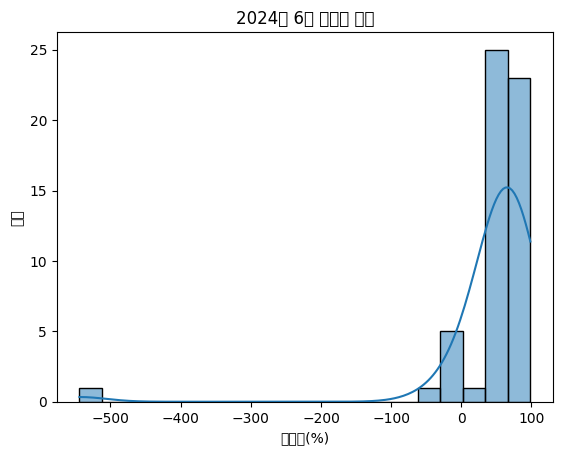

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

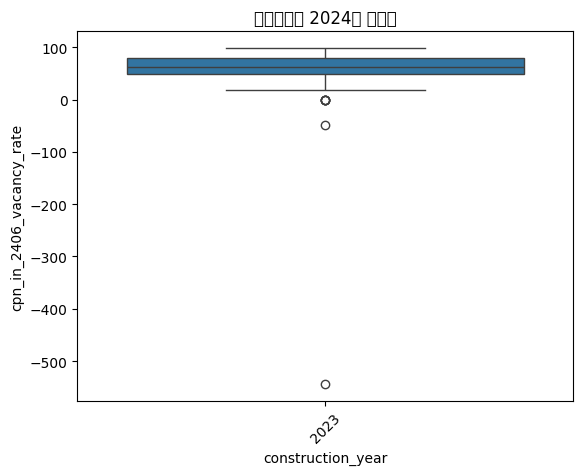

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# NaN 값 처리 (필요 시)
df = df.dropna(subset=['cpn_in_2406_vacancy_rate'])

# 공실률 히스토그램
sns.histplot(df['cpn_in_2406_vacancy_rate'], bins=20, kde=True)
plt.title('2024년 6월 공실률 분포')
plt.xlabel('공실률(%)')
plt.ylabel('빈도')
plt.show()

# 건축연도별 공실률 박스플롯
sns.boxplot(x='construction_year', y='cpn_in_2406_vacancy_rate', data=df)
plt.title('건축연도별 2024년 공실률')
plt.xticks(rotation=45)
plt.show()


In [44]:
# 결측치 확인
print(df[['construction_year', 'cpn_in_2406_vacancy_rate']].isnull().sum())

# 결측치 제거
df = df.dropna(subset=['construction_year', 'cpn_in_2406_vacancy_rate'])


construction_year           0
cpn_in_2406_vacancy_rate    0
dtype: int64


In [45]:
# construction_year가 숫자인지 확인 (문자라면 변환)
if df['construction_year'].dtype not in ['int64', 'float64']:
    df['construction_year'] = df['construction_year'].astype(str)

# cpn_in_2406_vacancy_rate가 숫자인지 확인
if df['cpn_in_2406_vacancy_rate'].dtype not in ['int64', 'float64']:
    df['cpn_in_2406_vacancy_rate'] = pd.to_numeric(df['cpn_in_2406_vacancy_rate'], errors='coerce')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

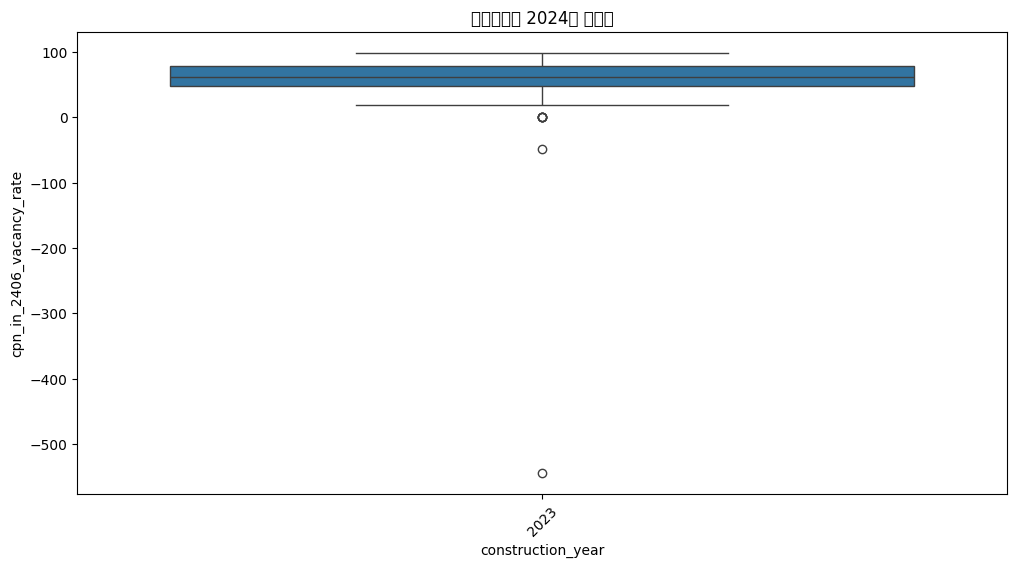

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='construction_year', y='cpn_in_2406_vacancy_rate', data=df)
plt.title('건축연도별 2024년 공실률')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

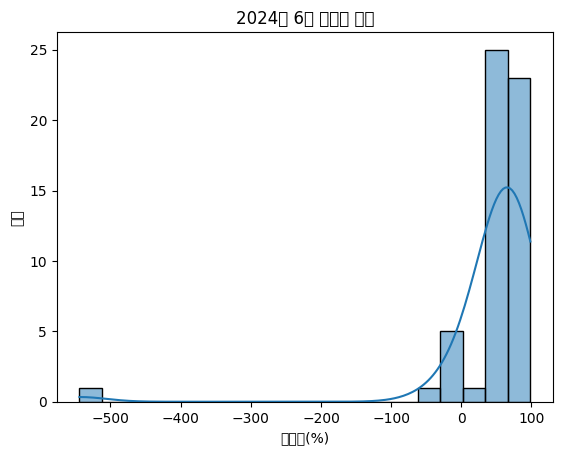

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

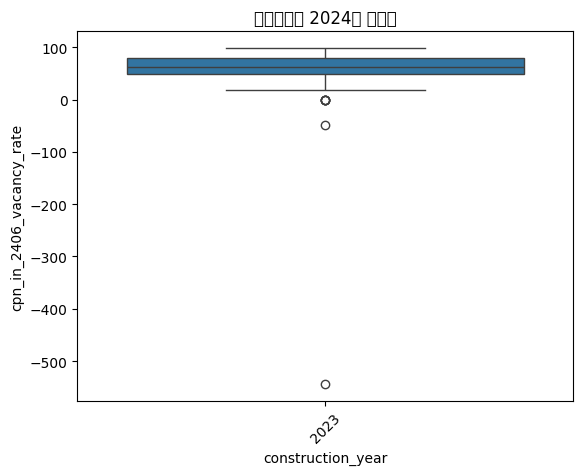

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 공실률 히스토그램
sns.histplot(df['cpn_in_2406_vacancy_rate'], bins=20, kde=True)
plt.title('2024년 6월 공실률 분포')
plt.xlabel('공실률(%)')
plt.ylabel('빈도')
plt.show()

# 건축연도별 공실률 박스플롯
sns.boxplot(x='construction_year', y='cpn_in_2406_vacancy_rate', data=df)
plt.title('건축연도별 2024년 공실률')
plt.xticks(rotation=45)
plt.show()
